# Projet 2: analyse des données

Notre application aura pour but de proposer a l'utilisateur des produits "meilleurs", en un certain sens. Encore faut-il qu'il y ait des produits "meilleurs" dans la base de données de l'application. Imaginons que l'on veuille que l'application propose des produits avec un bon Nutri-Score. Si la base de donnée ne contient quasiment que des produits avec un mauvais Nutri-Score alors l'application risque de ne proposer à l'utilisateur que des produits "un peu moins mauvais" et l'intérêt sera très limité. Nous allons donc dans un premier temps décrire les données afin de voir si on peut produire une application à partir des différentes variables.    

## Importation des éléments de travail

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import math
import numpy as np

In [2]:
data = pd.read_csv("food_facts_nettoye.csv", low_memory=False)

In [3]:
pd.set_option("display.max_columns", 200)

In [4]:
data.head()

,code,product_name,countries_fr,ingredients_text,serving_size,additives_n,additives,ingredients_from_palm_oil_n,ingredients_that_may_be_from_palm_oil_n,nutrition_grade_fr,pnns_groups_1,pnns_groups_2,energy_100g,fat_100g,saturated-fat_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,sodium_100g,nutrition-score-fr_100g
0,0000000004530,Banana Chips Sweetened (Whole),États-Unis,"Bananas, vegetable oil (coconut oil, corn oil ...",28 g (1 ONZ),0.0,[ bananas -> en:bananas ] [ vegetable-oil -...,0.0,0.0,d,NaN,NaN,NaN,28.57,28.57,64.29,14.29,3.6,3.57,0.000,0.000,14.0
1,0000000004559,Peanuts,États-Unis,"Peanuts, wheat flour, sugar, rice flour, tapio...",28 g (0.25 cup),0.0,[ peanuts -> en:peanuts ] [ wheat-flour -> ...,0.0,0.0,b,NaN,NaN,NaN,17.86,0.00,60.71,17.86,7.1,17.86,0.635,0.250,0.0
2,0000000016087,Organic Salted Nut Mix,États-Unis,"Organic hazelnuts, organic cashews, organic wa...",28 g (0.25 cup),0.0,[ organic-hazelnuts -> en:organic-hazelnuts ...,0.0,0.0,d,NaN,NaN,NaN,57.14,5.36,17.86,3.57,7.1,17.86,1.224,0.482,12.0
3,0000000016100,Breadshop Honey Gone Nuts Granola,États-Unis,"Rolled oats, grape concentrate, expeller press...",52 g (0.5 cup),0.0,[ rolled-oats -> en:rolled-oats ] [ oats ->...,0.0,0.0,NaN,NaN,NaN,NaN,18.27,1.92,63.46,11.54,7.7,13.46,NaN,NaN,NaN
4,0000000016124,Organic Muesli,États-Unis,"Org oats, org hemp granola (org oats, evaporat...",64 g (0.5 cup),2.0,[ org-oats -> en:org-oats ] [ oats -> en:oa...,0.0,0.0,c,NaN,NaN,NaN,18.75,4.69,57.81,15.62,9.4,14.06,0.140,0.055,7.0


In [5]:
data.shape

(228729, 22)

## Analyse univariée

In [6]:
data.describe()

,additives_n,ingredients_from_palm_oil_n,ingredients_that_may_be_from_palm_oil_n,energy_100g,fat_100g,saturated-fat_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,sodium_100g,nutrition-score-fr_100g
count,224767.000000,224767.000000,224767.000000,96565.000000,227689.000000,207344.000000,227680.000000,222259.000000,180681.000000,228147.000000,227929.000000,227955.000000,199992.000000
mean,2.018557,0.019958,0.054452,369.422720,12.898067,5.036305,32.630142,16.023296,2.885238,7.134449,1.306741,0.523488,9.139251
std,2.527677,0.141565,0.266142,250.989777,17.485249,7.705660,29.063898,21.169826,4.485105,8.083308,4.480113,1.897516,9.061484
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-15.000000
25%,0.000000,0.000000,0.000000,175.000000,0.000000,0.000000,6.600000,1.380000,0.000000,0.780000,0.066000,0.026000,1.000000
50%,1.000000,0.000000,0.000000,322.000000,5.360000,1.790000,21.540000,5.830000,1.600000,4.800000,0.589000,0.232000,10.000000
75%,3.000000,0.000000,0.000000,556.000000,20.590000,7.140000,59.000000,24.000000,3.600000,10.015000,1.361000,0.536000,16.000000
max,31.000000,2.000000,6.000000,900.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,40.000000


In [7]:
data.rename(columns={'saturated-fat_100g':'saturated_fat_100g'}, inplace=True) # Pour éviter un problème de syntaxe plus tard

In [8]:
quantite_100g = ['fat_100g', 'saturated_fat_100g', 'carbohydrates_100g', 'sugars_100g', 'fiber_100g',
       'proteins_100g', 'salt_100g', 'sodium_100g']
quantite_et_energie_100g = ['energy_100g','fat_100g', 'saturated_fat_100g', 'carbohydrates_100g', 'sugars_100g', 'fiber_100g',
       'proteins_100g', 'salt_100g', 'sodium_100g']
colonnes = ['pnns_groups_1','nutrition_grade_fr','energy_100g','fat_100g',
       'saturated_fat_100g', 'carbohydrates_100g', 'sugars_100g', 'fiber_100g',
       'proteins_100g', 'salt_100g', 'sodium_100g','nutrition-score-fr_100g']
quantite_et_categ = ['pnns_groups_1','fat_100g', 'saturated_fat_100g', 'carbohydrates_100g', 'sugars_100g', 'fiber_100g',
       'proteins_100g', 'salt_100g', 'sodium_100g']

## Visualisation graphique des données

### Nutri-score

In [9]:
data['nutrition_grade_fr'].value_counts()

d    56797
c    41068
e    38668
a    32813
b    30646
Name: nutrition_grade_fr, dtype: int64

<AxesSubplot:ylabel='nutrition_grade_fr'>

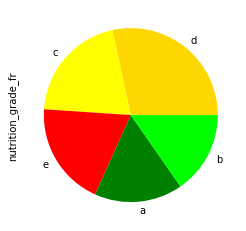

In [10]:
couleur=['#ffd700','#ffff00','#ff0000','#008000', '#00ff00']
data['nutrition_grade_fr'].value_counts().plot(kind='pie', colors=couleur)

[Text(0.5, 1.0, 'Nutri-Score')]

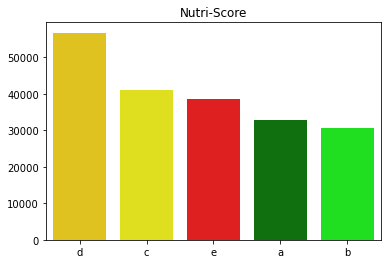

In [11]:
dico_couleur = {'d':'#ffd700','c':'#ffff00','e':'#ff0000','a':'#008000', 'b':'#00ff00'}
comptage = data['nutrition_grade_fr'].value_counts()
sns.barplot(x=comptage.index, y=comptage.values, palette=dico_couleur).set(title='Nutri-Score')

On constate que toutes les valeurs de Nutri-Score sont représentées en grandes quantités, même s'il y a plus de produits avec un mauvais Nutri-Score. Il est donc envisageable que notre application recommande des produit avec un bon Nutri-Score.

### Additifs

In [12]:
data['additives_n'].describe()

count    224767.000000
mean          2.018557
std           2.527677
min           0.000000
25%           0.000000
50%           1.000000
75%           3.000000
max          31.000000
Name: additives_n, dtype: float64

In [13]:
data['additives_n'].value_counts()

0.0     79823
1.0     42944
2.0     34425
3.0     22336
4.0     14382
5.0     10308
6.0      6877
7.0      4412
8.0      3164
9.0      2064
10.0     1262
11.0      849
12.0      564
13.0      358
14.0      305
15.0      215
16.0      118
17.0      104
18.0       67
19.0       50
20.0       47
22.0       26
21.0       20
23.0       14
25.0       11
24.0       10
31.0        4
26.0        2
28.0        2
27.0        2
29.0        2
Name: additives_n, dtype: int64

In [14]:
def classification_nbre_additifs(n):
    if n == 0:
        return 'aucun'
    elif n <= 3 :
        return '1 à 3'
    elif n <= 6:
        return '4 à 6'
    elif n <= 9:
        return '7 à 9'
    else : 
        return '10+'

[Text(0.5, 1.0, "Nombre d'additifs")]

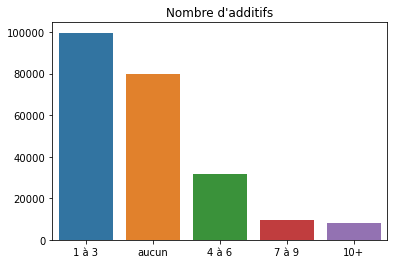

In [15]:
comptage = data['additives_n'].apply(classification_nbre_additifs).value_counts()
sns.barplot(x=comptage.index, y=comptage.values).set(title='Nombre d\'additifs')

Il est envisageable que l'application recommande des produit en fonction du nombre d'additifs qu'ils contiennent suivant le découpage en classe ci-dessus. En revanche il n'y aurait pas un grand intérêt à distinguer les produits contenant 29 additifs des produits qui en contiennent 28, car il y en a trop peu.

### Huile de palme

In [16]:
data['ingredients_from_palm_oil_n'].value_counts()

0.0    220335
1.0      4378
2.0        54
Name: ingredients_from_palm_oil_n, dtype: int64

<AxesSubplot:title={'center':"Ingrédients contenants de l'huile de palme"}>

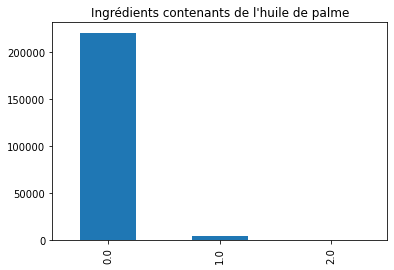

In [17]:
data['ingredients_from_palm_oil_n'].value_counts().plot(kind='bar', title='Ingrédients contenants de l\'huile de palme')

Dans le cas de la présence d'huile de palme, il ne semble pas pertinent de s'intéresser au nombre exact d'ingrédient contenant de l'huile de palme, mais seulement de répondre à la question: y-a-t'il, oui ou non, des ingrédients à base d'huile de palme?

In [18]:
data['ingredients_that_may_be_from_palm_oil_n'].value_counts()

0.0    214316
1.0      8996
2.0      1169
3.0       244
4.0        38
5.0         3
6.0         1
Name: ingredients_that_may_be_from_palm_oil_n, dtype: int64

In [19]:
def classification_nbre_palm_oil_maybe(n):
    if n == 0:
        return 'aucun'
    elif n == 1 :
        return '1'
    elif n == 2:
        return '2'
    else : 
        return '3 à 6'

[Text(0.5, 1.0, "Ingrédients pouvant contenir de l'huile de palme")]

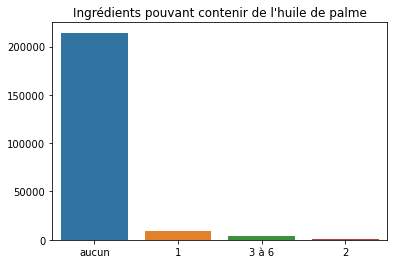

In [20]:
comptage = data['ingredients_that_may_be_from_palm_oil_n'].apply(classification_nbre_palm_oil_maybe).value_counts()
sns.barplot(x=comptage.index, y=comptage.values).set(title='Ingrédients pouvant contenir de l\'huile de palme')

Dans le cas de la présence potentielle d'huile de palme, il ne semble pas pertinent de s'intéresser au nombre exact d'ingrédient pouvant contenir de l'huile de palme, mais seulement de répondre à la question: y-a-t'il, oui ou non, des ingrédients susceptible de contenir de l'huile de palme?

Finalement, concernant la présence d'huile de palme, il serait plus pertinant d'utiliser une seule variable prennant trois valeurs possibles: oui, non, peut-être.

## Valeurs nutritionnelles pour 100g

### Energie

In [21]:
data['energy_100g'].describe()

count    96565.000000
mean       369.422720
std        250.989777
min          0.000000
25%        175.000000
50%        322.000000
75%        556.000000
max        900.000000
Name: energy_100g, dtype: float64

<AxesSubplot:>

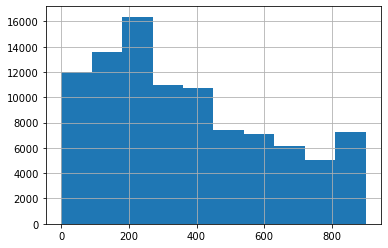

In [22]:
data['energy_100g'].hist()

In [23]:
meanprops = {'marker':'o', 'markeredgecolor':'black', 'markerfacecolor':'firebrick'}
# Un point rouge indiquera la moyenne dans les boxplot

<AxesSubplot:>

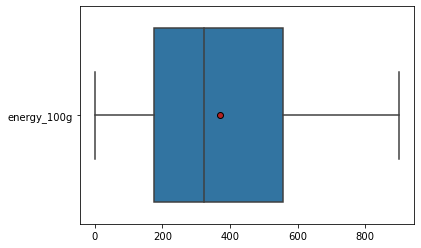

In [24]:
sns.boxplot(data=data[['energy_100g']], orient='h', showmeans=True, meanprops=meanprops)

### Nutriments

In [25]:
data[quantite_100g].describe()

,fat_100g,saturated_fat_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,sodium_100g
count,227689.000000,207344.000000,227680.000000,222259.000000,180681.000000,228147.000000,227929.000000,227955.000000
mean,12.898067,5.036305,32.630142,16.023296,2.885238,7.134449,1.306741,0.523488
std,17.485249,7.705660,29.063898,21.169826,4.485105,8.083308,4.480113,1.897516
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,6.600000,1.380000,0.000000,0.780000,0.066000,0.026000
50%,5.360000,1.790000,21.540000,5.830000,1.600000,4.800000,0.589000,0.232000
75%,20.590000,7.140000,59.000000,24.000000,3.600000,10.015000,1.361000,0.536000
max,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000


<AxesSubplot:>

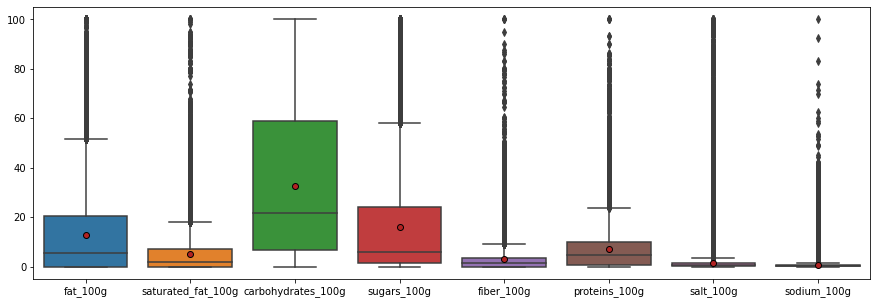

In [26]:
plt.figure(figsize=(15, 5))
sns.boxplot(data=data[quantite_100g], showmeans=True, meanprops=meanprops)

<AxesSubplot:>

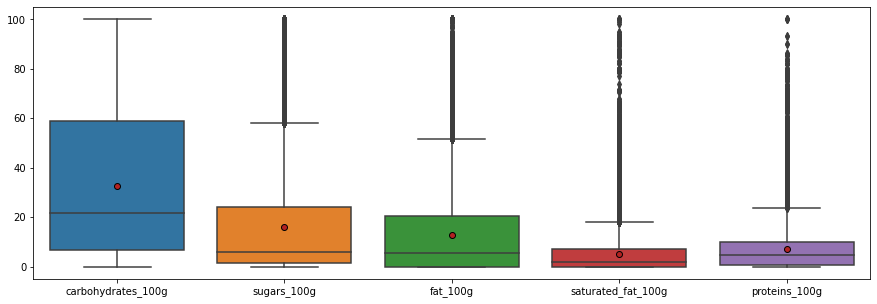

In [27]:
plt.figure(figsize=(15, 5))
sns.boxplot(data=data[['carbohydrates_100g','sugars_100g','fat_100g','saturated_fat_100g','proteins_100g']],
           showmeans=True, meanprops=meanprops)

In [28]:
#Pour les quantités de fibres et de sel, on va faire une représentation en enlevant les valeurs extrêmes
def data_sans_val_ext(data, colonne):
    sup = data[colonne].quantile(0.75) + 1.5*(data[colonne].quantile(0.75)-data[colonne].quantile(0.25))
    return data[data[colonne] < sup]

In [29]:
sel_et_fibres = data_sans_val_ext(data, 'fiber_100g')
sel_et_fibres = data_sans_val_ext(sel_et_fibres, 'salt_100g')
sel_et_fibres = data_sans_val_ext(sel_et_fibres, 'sodium_100g')

<AxesSubplot:>

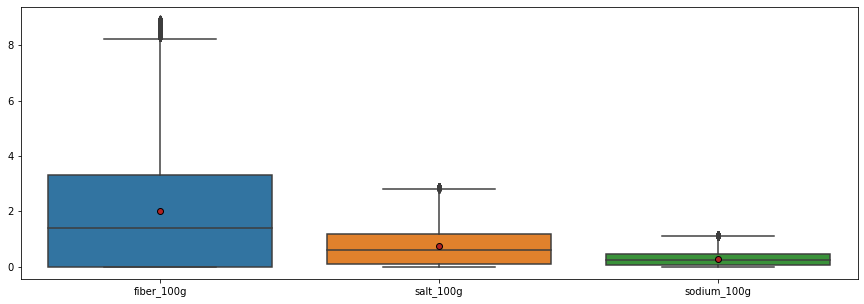

In [30]:
plt.figure(figsize=(15, 5))
sns.boxplot(data=sel_et_fibres[['fiber_100g','salt_100g','sodium_100g']], showmeans=True, meanprops=meanprops)

On voit que certaines quantités sont généralement faibles comparées à d'autres, mais en fait une variation de consommation quotidienne de sucre de 10g n'aura pas les même conséquences sur l'organisme qu'une variation de consommation quotidienne de sel de 10g. Il faudrait l'avis d'un spécialiste en ce qui concerne les quantités de nutriments.

### Glucides

<AxesSubplot:>

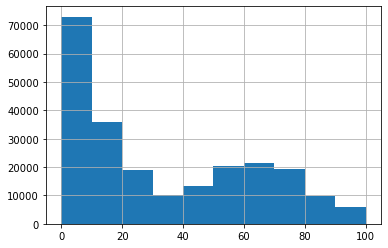

In [31]:
data['carbohydrates_100g'].hist()

<AxesSubplot:>

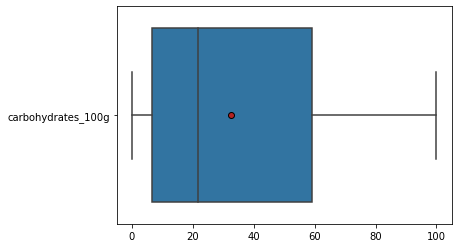

In [32]:
sns.boxplot(data=data[['carbohydrates_100g']], orient='h', showmeans=True, meanprops=meanprops)

<AxesSubplot:>

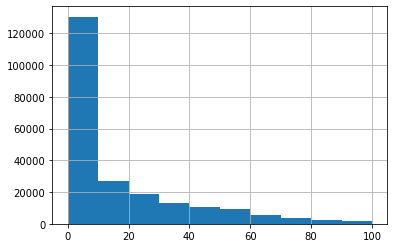

In [33]:
data['sugars_100g'].hist()

<AxesSubplot:>

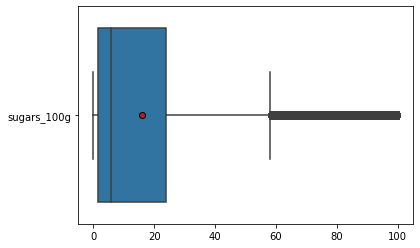

In [34]:
sns.boxplot(data=data[['sugars_100g']], orient='h', showmeans=True, meanprops=meanprops)

### Lipides

<AxesSubplot:>

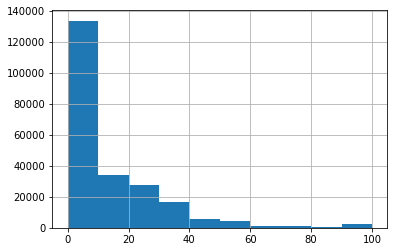

In [35]:
data['fat_100g'].hist()

<AxesSubplot:>

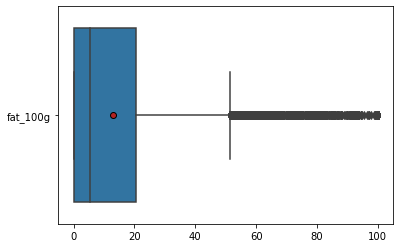

In [36]:
sns.boxplot(data=data[['fat_100g']], orient='h', showmeans=True, meanprops=meanprops)

<AxesSubplot:>

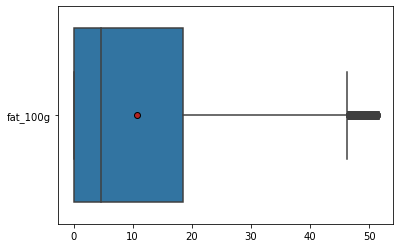

In [37]:
# Sans valeurs extrêmes
sns.boxplot(data=data_sans_val_ext(data, 'fat_100g')[['fat_100g']], orient='h', showmeans=True, meanprops=meanprops)

<AxesSubplot:>

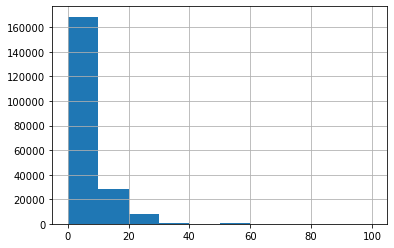

In [38]:
data['saturated_fat_100g'].hist()

<AxesSubplot:>

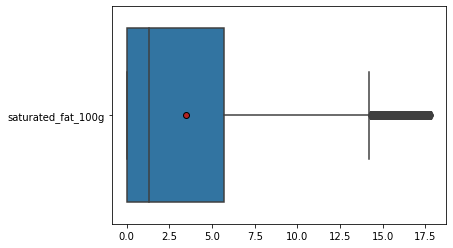

In [39]:
# Sans valeurs extrêmes
sns.boxplot(data=data_sans_val_ext(data, 'saturated_fat_100g')[['saturated_fat_100g']], orient='h',
           showmeans=True, meanprops=meanprops)

### Protéines

<AxesSubplot:>

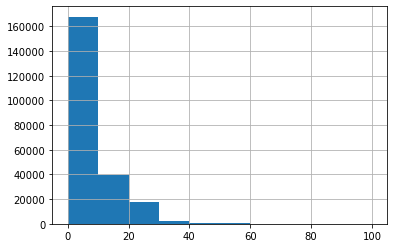

In [40]:
data['proteins_100g'].hist()

<AxesSubplot:>

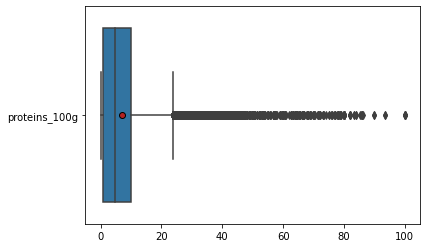

In [41]:
sns.boxplot(data=data[['proteins_100g']], orient='h', showmeans=True, meanprops=meanprops)

<AxesSubplot:>

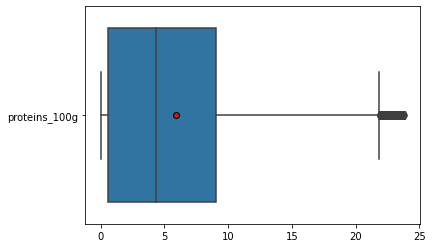

In [42]:
# Sans valeurs extrêmes
sns.boxplot(data=data_sans_val_ext(data, 'proteins_100g')[['proteins_100g']], orient='h',
           showmeans=True, meanprops=meanprops)

# Analyse bivariée

## Analyse par catégorie

Dans cette section on va essentiellement faire une description de nos données similaire à l'analyse de la section précédente mais en séparant les données par catégorie de produit. On dispose de deux classifications différentes, la classification "pnns_groups_2" étant plus fine que "pnns_groups_1". Le nombre important de catégories dans "pnns_groups_2" rend les graphiques et les tableaux difficilement lisibles donc l'analyse par catégorie sera effectuée, à quelques exceptions près, selon la classification par "pnns_groups_1".

In [43]:
data['pnns_groups_1'].unique()

array([nan, 'unknown', 'Fruits and vegetables', 'Sugary snacks',
       'Composite foods', 'Beverages', 'Fish Meat Eggs',
       'Cereals and potatoes', 'Milk and dairy products',
       'Fat and sauces', 'Salty snacks', 'fruits-and-vegetables',
       'sugary-snacks', 'cereals-and-potatoes', 'salty-snacks'],
      dtype=object)

In [44]:
data['pnns_groups_2'].unique()

array([nan, 'unknown', 'Vegetables', 'Biscuits and cakes',
       'Pizza pies and quiche', 'Sweets', 'Sweetened beverages',
       'One-dish meals', 'Soups', 'Meat', 'Cereals', 'Fruits',
       'Milk and yogurt', 'Fats', 'Cheese', 'Dressings and sauces',
       'Chocolate products', 'Sandwich', 'Bread', 'Nuts', 'Legumes',
       'Non-sugared beverages', 'Breakfast cereals', 'Appetizers',
       'Artificially sweetened beverages', 'Fruit juices', 'Eggs',
       'Fish and seafood', 'Dried fruits', 'Ice cream', 'Processed meat',
       'Potatoes', 'vegetables', 'pastries', 'Dairy desserts',
       'Alcoholic beverages', 'Fruit nectars', 'fruits',
       'Salty and fatty products', 'Tripe dishes', 'cereals', 'legumes',
       'nuts'], dtype=object)

In [45]:
# On supprime les doublons tels que 'Salty snacks' et 'salty-snacks'
def lower_case(mots):
    if type(mots) == str:
        return mots.replace("-", " ").lower()

In [46]:
data['pnns_groups_1'] = data['pnns_groups_1'].apply(lower_case)
data['pnns_groups_1'].unique()

array([None, 'unknown', 'fruits and vegetables', 'sugary snacks',
       'composite foods', 'beverages', 'fish meat eggs',
       'cereals and potatoes', 'milk and dairy products',
       'fat and sauces', 'salty snacks'], dtype=object)

In [47]:
data['pnns_groups_2'] = data['pnns_groups_2'].apply(lower_case)
data['pnns_groups_2'].unique()

array([None, 'unknown', 'vegetables', 'biscuits and cakes',
       'pizza pies and quiche', 'sweets', 'sweetened beverages',
       'one dish meals', 'soups', 'meat', 'cereals', 'fruits',
       'milk and yogurt', 'fats', 'cheese', 'dressings and sauces',
       'chocolate products', 'sandwich', 'bread', 'nuts', 'legumes',
       'non sugared beverages', 'breakfast cereals', 'appetizers',
       'artificially sweetened beverages', 'fruit juices', 'eggs',
       'fish and seafood', 'dried fruits', 'ice cream', 'processed meat',
       'potatoes', 'pastries', 'dairy desserts', 'alcoholic beverages',
       'fruit nectars', 'salty and fatty products', 'tripe dishes'],
      dtype=object)

In [48]:
data.groupby(['pnns_groups_1'])[quantite_et_energie_100g].describe()

energy_100g                                        \
                              count        mean         std   min     25%   
pnns_groups_1                                                               
beverages                    4827.0  169.615173  113.135571   0.0  113.00   
cereals and potatoes         1096.0  489.314745  198.021594   0.0  352.45   
composite foods              4205.0  530.646654  208.108035  31.0  387.00   
fat and sauces               1590.0  430.931145  204.940468   0.0  274.25   
fish meat eggs               3206.0  581.539186  171.334841   0.0  462.00   
fruits and vegetables        3618.0  217.075133  146.252782   0.0  110.00   
milk and dairy products      3708.0  422.891370  187.512979   0.0  280.00   
salty snacks                   67.0  580.247910  208.510361   0.0  437.50   
sugary snacks                 665.0  629.061549  172.289559   0.0  519.00   
unknown                      4322.0  435.141354  253.323853   0.0  226.00   

                                                fat_100g             \
                           50%       75%    max    count       mean   
pnns_groups_1                                                         
beverages                180.0  207.0000  899.0   5133.0   0.824070   
cereals and potatoes     446.0  640.2725  900.0   6624.0   6.091609   
composite foods          536.0  693.0000  900.0   5637.0   7.526312   
fat and sauces           415.5  588.0000  899.0   3533.0  38.488731   
fish meat eggs           537.0  731.0000  900.0   5206.0  13.620439   
fruits and vegetables    182.5  277.0000  900.0   4133.0   2.364924   
milk and dairy products  397.0  536.0000  900.0   6564.0  13.600256   
salty snacks             604.0  751.5000  894.0   2295.0  30.727098   
sugary snacks            683.0  748.0000  896.0   9561.0  19.789126   
unknown                  420.0  653.0000  900.0  10086.0  13.007870   

                                                                   \
                               std  min   25%   50%    75%    max   
pnns_groups_1                                                       
beverages                 2.990396  0.0   0.0   0.0   0.50   60.0   
cereals and potatoes      8.566145  0.0   1.5   3.0   7.00   85.0   
composite foods           5.318983  0.0   3.8   6.7  10.00   70.0   
fat and sauces           36.578152  0.0   3.2  26.5  80.00  100.0   
fish meat eggs           11.708116  0.0   3.5  11.0  20.00   73.0   
fruits and vegetables     7.759814  0.0   0.2   0.5   0.90   74.0   
milk and dairy products  11.810744  0.0   3.0   9.1  25.00   60.0   
salty snacks             14.459468  0.0  21.8  30.1  36.85   78.0   
sugary snacks            13.744418  0.0   7.2  21.2  30.00  100.0   
unknown                  15.109092  0.0   1.7   7.8  20.00  100.0   

                        saturated_fat_100g                                  \
                                     count       mean        std  min  25%   
pnns_groups_1                                                                
beverages                           5064.0   0.535805   2.701254  0.0  0.0   
cereals and potatoes                6631.0   1.692944   2.716815  0.0  0.3   
composite foods                     5637.0   2.539143   2.556494  0.0  0.8   
fat and sauces                      3551.0  11.339591  18.348985  0.0  0.4   
fish meat eggs                      5260.0   4.507286   4.505953  0.0  1.1   
fruits and vegetables               4108.0   0.752583   4.165162  0.0  0.0   
milk and dairy products             6583.0   9.105558   8.041320  0.0  1.9   
salty snacks                        2304.0   5.584116   5.768879  0.0  2.5   
sugary snacks                       9644.0   9.965867   8.272610  0.0  1.7   
unknown                            10012.0   4.876864   7.021767  0.0  0.4   

                                           carbohydrates_100g             \
                          50%   75%    max              count       mean   
pnns_groups_1                    

In [49]:
moyenne_categ = data.groupby(['pnns_groups_1']).mean()[quantite_100g] # Moyenne par catégorie
moyenne_categ

,fat_100g,saturated_fat_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,sodium_100g
pnns_groups_1,,,,,,,,
beverages,0.824070,0.535805,12.790365,11.768489,0.709600,0.883586,0.133710,0.052664
cereals and potatoes,6.091609,1.692944,55.146369,6.730149,5.401084,10.062686,0.650463,0.256104
composite foods,7.526312,2.539143,15.717560,2.407977,2.151717,7.553143,1.123812,0.442448
fat and sauces,38.488731,11.339591,8.031580,5.862499,1.065502,1.865653,1.875449,0.738365
fish meat eggs,13.620439,4.507286,2.070148,0.874038,0.804517,18.676918,2.037077,0.802017
fruits and vegetables,2.364924,0.752583,14.513896,10.444786,3.056323,2.334927,0.555404,0.218681
milk and dairy products,13.600256,9.105558,8.904534,7.639555,0.415211,9.747785,0.671671,0.264401
salty snacks,30.727098,5.584116,45.426766,4.743775,4.780114,10.352708,1.527892,0.601544
sugary snacks,19.789126,9.965867,58.120464,39.858124,3.567494,5.517021,0.392371,0.163073


In [50]:
median_categ = data.groupby(['pnns_groups_1']).median()[quantite_100g] # Mediane par catégories
median_categ

,fat_100g,saturated_fat_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,sodium_100g
pnns_groups_1,,,,,,,,
beverages,0.0,0.00,9.8,9.0,0.10,0.30,0.010,0.004
cereals and potatoes,3.0,0.60,64.0,3.1,4.00,9.40,0.430,0.169
composite foods,6.7,1.80,13.7,2.0,1.70,7.00,0.930,0.366
fat and sauces,26.5,3.57,4.9,2.5,0.50,1.10,1.270,0.500
fish meat eggs,11.0,2.70,0.9,0.6,0.30,19.00,1.778,0.700
fruits and vegetables,0.5,0.10,7.4,3.5,2.00,1.30,0.110,0.043
milk and dairy products,9.1,6.00,4.8,4.8,0.07,4.60,0.152,0.060
salty snacks,30.1,3.40,51.5,3.1,4.20,7.14,1.460,0.575
sugary snacks,21.2,9.40,58.0,39.0,2.50,5.90,0.230,0.091


### Nutri-score par catégorie

<AxesSubplot:xlabel='count', ylabel='pnns_groups_1'>

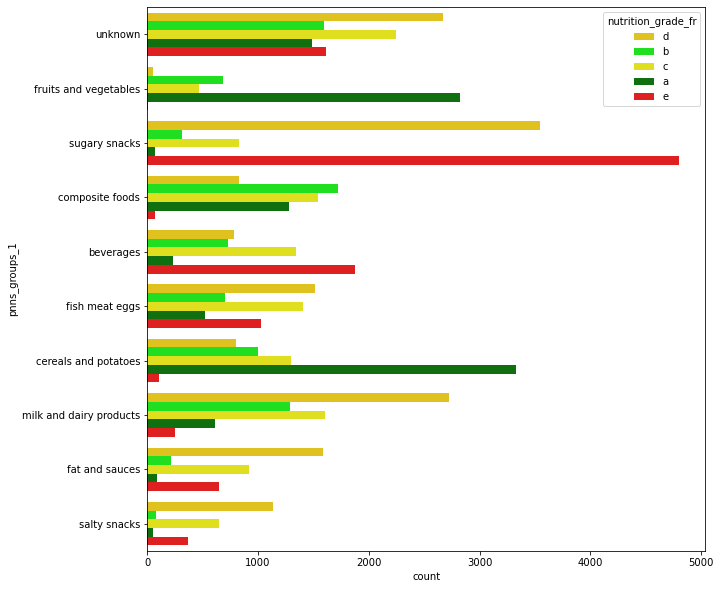

In [51]:
plt.figure(figsize=(10,10))
sns.countplot(y='pnns_groups_1', hue='nutrition_grade_fr', data=data, palette=dico_couleur)

Pour certaines catégories, par exemple 'sugary snack', il n'y aura pas beaucoup de "bons" produits à recommander. Peut-être qu'il faudra parfois proposer un produit d'une autre catégorie.

<AxesSubplot:xlabel='count', ylabel='pnns_groups_2'>

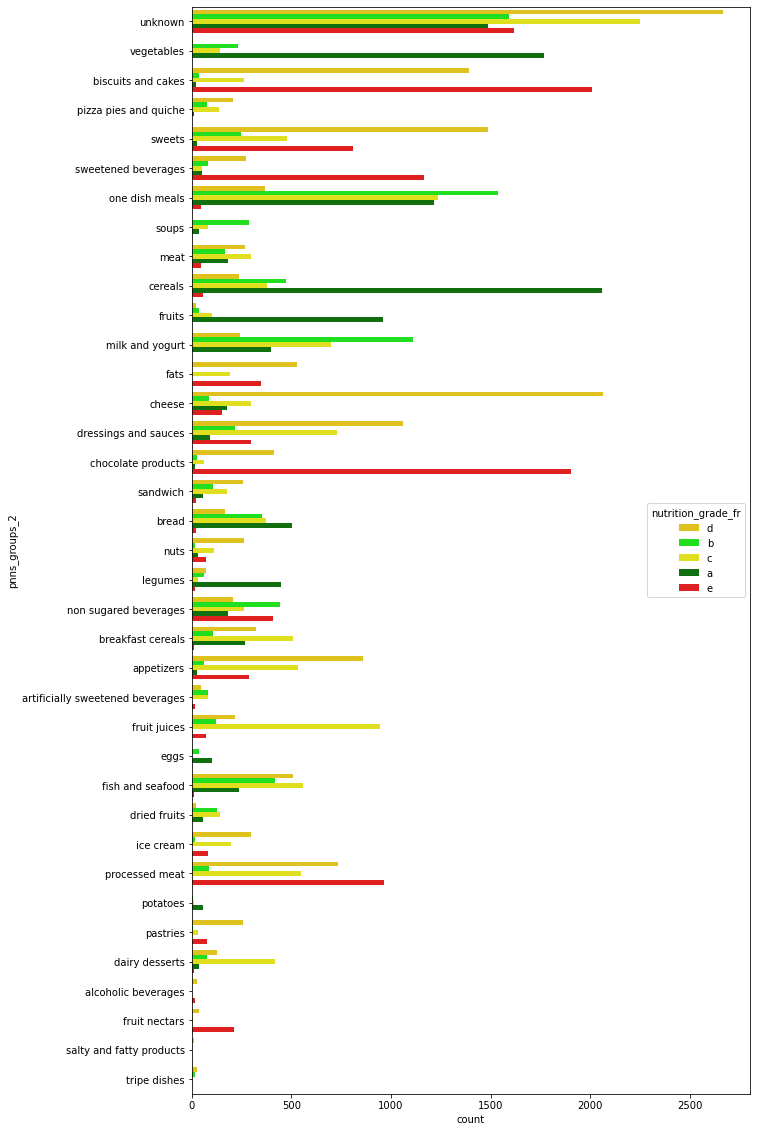

In [52]:
plt.figure(figsize=(10,20))
sns.countplot(y='pnns_groups_2', hue='nutrition_grade_fr', data=data, palette=dico_couleur)

### Lipides par catégorie

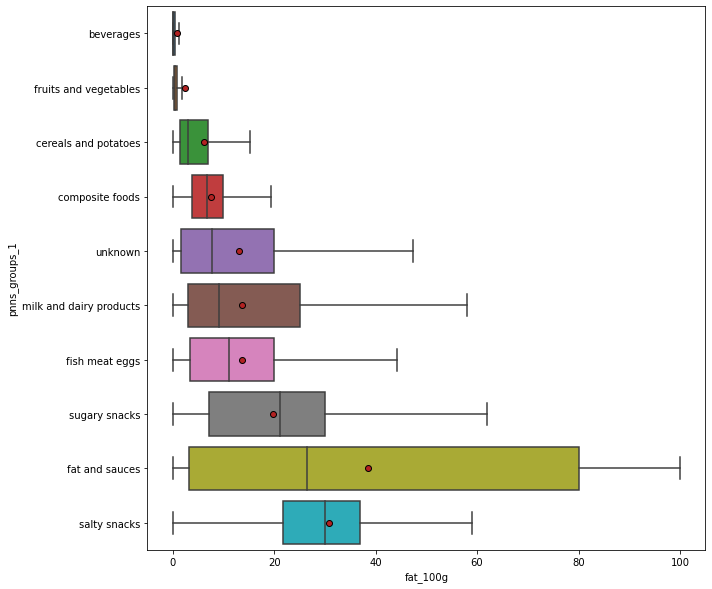

In [53]:
ordre_fat = data.groupby('pnns_groups_1')['fat_100g'].median().sort_values().index

plt.figure(figsize=(10,10))
sns.boxplot(x="fat_100g",y="pnns_groups_1", showfliers=False, showmeans=True, meanprops=meanprops,
            orient='h', order=ordre_fat, data=data);

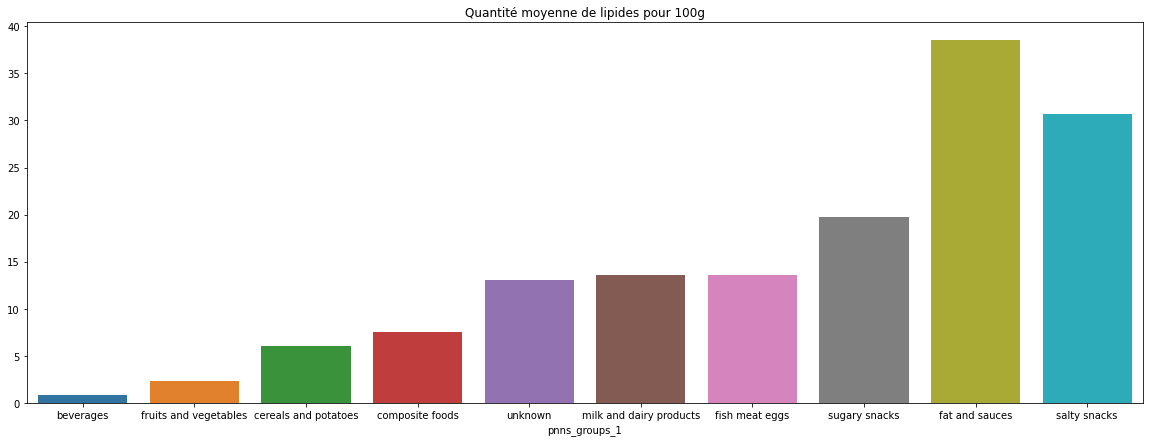

In [54]:
plt.figure(figsize=(20,7))
plt.title('Quantité moyenne de lipides pour 100g')
sns.barplot(x=moyenne_categ['fat_100g'].index, y=moyenne_categ['fat_100g'].values, order=ordre_fat);

### Glucides par catégorie

<AxesSubplot:xlabel='carbohydrates_100g', ylabel='pnns_groups_1'>

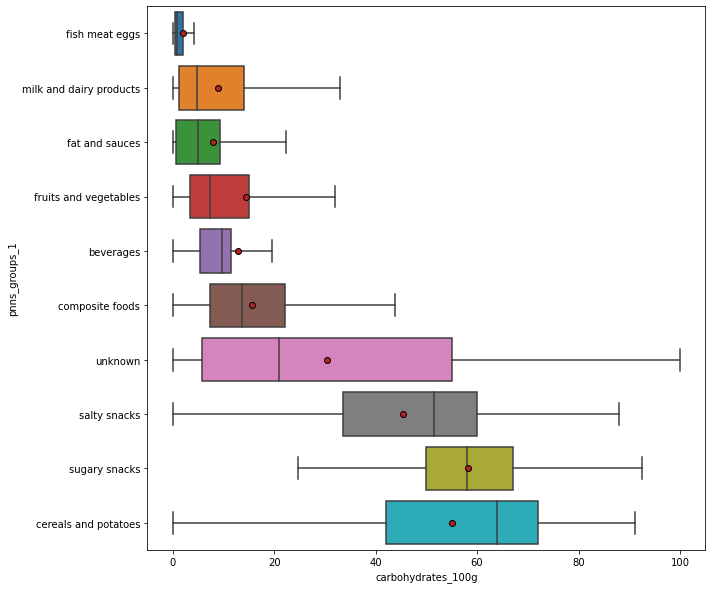

In [55]:
ordre_glucide = data.groupby('pnns_groups_1')['carbohydrates_100g'].median().sort_values().index

plt.figure(figsize=(10,10))
sns.boxplot(x="carbohydrates_100g", y="pnns_groups_1", showfliers=False, showmeans=True, meanprops=meanprops, 
            orient='h', order=ordre_glucide, data=data)

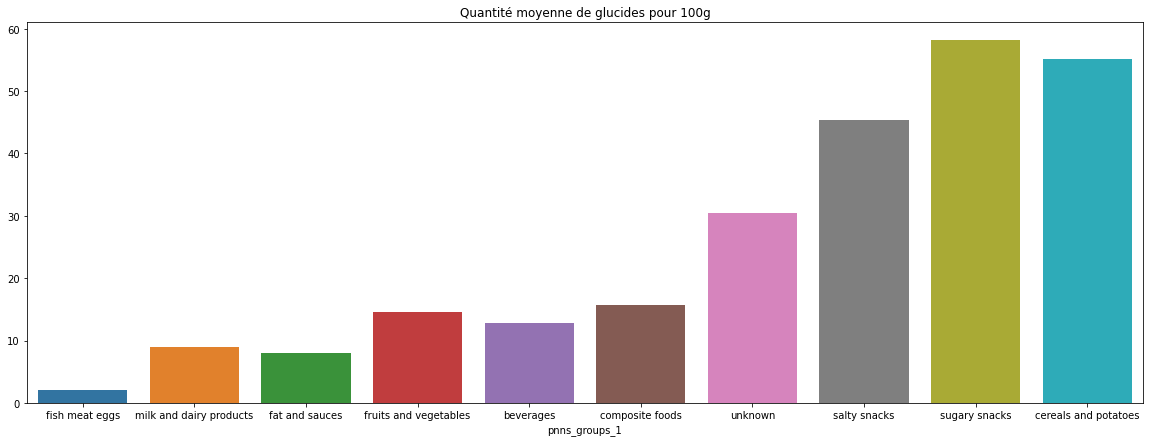

In [56]:
plt.figure(figsize=(20,7))
plt.title('Quantité moyenne de glucides pour 100g')
sns.barplot(x=moyenne_categ['carbohydrates_100g'].index, y=moyenne_categ['carbohydrates_100g'].values, order=ordre_glucide);

### Protéines par catégories

<AxesSubplot:xlabel='proteins_100g', ylabel='pnns_groups_1'>

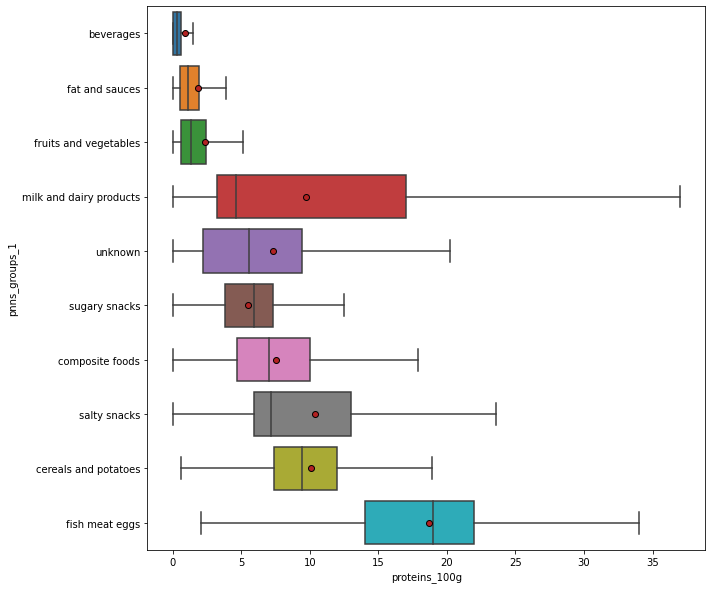

In [57]:
ordre_prot = data.groupby('pnns_groups_1')['proteins_100g'].median().sort_values().index

plt.figure(figsize=(10,10))
sns.boxplot(x="proteins_100g", y="pnns_groups_1", showfliers=False, showmeans=True, meanprops=meanprops, 
            orient='h', order=ordre_prot, data=data)

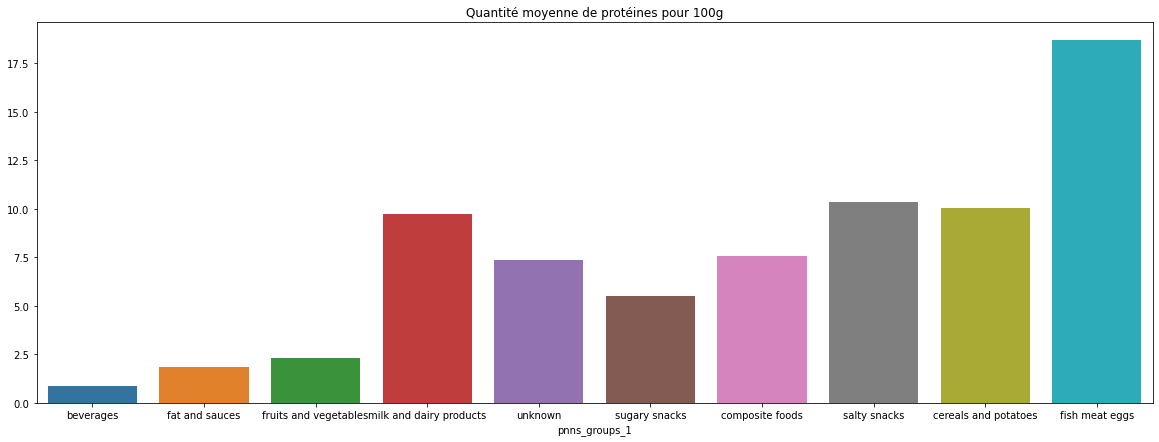

In [58]:
plt.figure(figsize=(20,7))
plt.title('Quantité moyenne de protéines pour 100g')
sns.barplot(x=moyenne_categ['proteins_100g'].index, y=moyenne_categ['proteins_100g'].values, order=ordre_prot);

## Quantités pour 100g en fonction de la catégorie

Nous allons effectuer un tests statistiques (anova) afin de voir si la catégorie des produits à une influence sur leurs valeurs nutritionnelles. Si c'est le cas on pourra envisager de recommander certaines catégories de produit plutôt que d'autres. 

In [59]:
# import de modules pour les analyses bivariées
from scipy import stats
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [60]:
def eta_square(data, categ, variable):
    mod = ols(variable + ' ~ ' + categ, data=data).fit()
    anova_table = sm.stats.anova_lm(mod, typ=2)
    return anova_table['sum_sq'][0]/(anova_table['sum_sq'][0]+anova_table['sum_sq'][1])

In [61]:
liste = []
for c in quantite_100g:
        liste.append(eta_square(data, 'pnns_groups_1', c)) # ANOVA suivant les catégories de 'pnns_groups_1'
pd.DataFrame(liste, index =quantite_100g, columns=['eta_carre'])

,eta_carre
fat_100g,0.303111
saturated_fat_100g,0.196176
carbohydrates_100g,0.556412
sugars_100g,0.449524
fiber_100g,0.147893
proteins_100g,0.374879
salt_100g,0.034128
sodium_100g,0.031360


In [62]:
liste = []
for c in quantite_100g:
        liste.append(eta_square(data, 'pnns_groups_2', c))# ANOVA suivant les catégories de 'pnns_groups_2'
pd.DataFrame(liste, index =quantite_100g, columns=['eta_carre'])

,eta_carre
fat_100g,0.565177
saturated_fat_100g,0.492992
carbohydrates_100g,0.638666
sugars_100g,0.563007
fiber_100g,0.208751
proteins_100g,0.514014
salt_100g,0.043938
sodium_100g,0.040146


On remarque que la catégorie d'un produit influence plus certaines variables (carbohydrates, protéines...) que d'autres (sodium), mais aussi que des catégories plus fines sont parfois beaucoup plus significatives (saturated_fat). Il serait donc judicieux de faire un mixte entre 'pnns_groups_1' et 'pnns_groups_2' pour notre application. 

## Nutri-score par catégorie

Nous allons tenter de savoir s'il y a un lien entre catégorie et Nutri-Score.

In [63]:
cont = data[['nutrition_grade_fr','pnns_groups_1']].pivot_table(index='nutrition_grade_fr',columns='pnns_groups_1',aggfunc=len,margins=True,margins_name="Total")
cont

pnns_groups_1,beverages,cereals and potatoes,composite foods,fat and sauces,fish meat eggs,fruits and vegetables,milk and dairy products,salty snacks,sugary snacks,unknown,Total
nutrition_grade_fr,,,,,,,,,,,
a,234,3330,1279,91,517,2822,609,55,66,1484,10487
b,725,996,1718,216,703,681,1285,75,312,1593,8304
c,1343,1298,1544,920,1403,467,1607,647,830,2247,12306
d,779,799,832,1589,1510,47,2728,1135,3544,2667,15630
e,1871,104,69,644,1023,3,248,363,4799,1616,10740
Total,4952,6527,5442,3460,5156,4020,6477,2275,9551,9607,57467


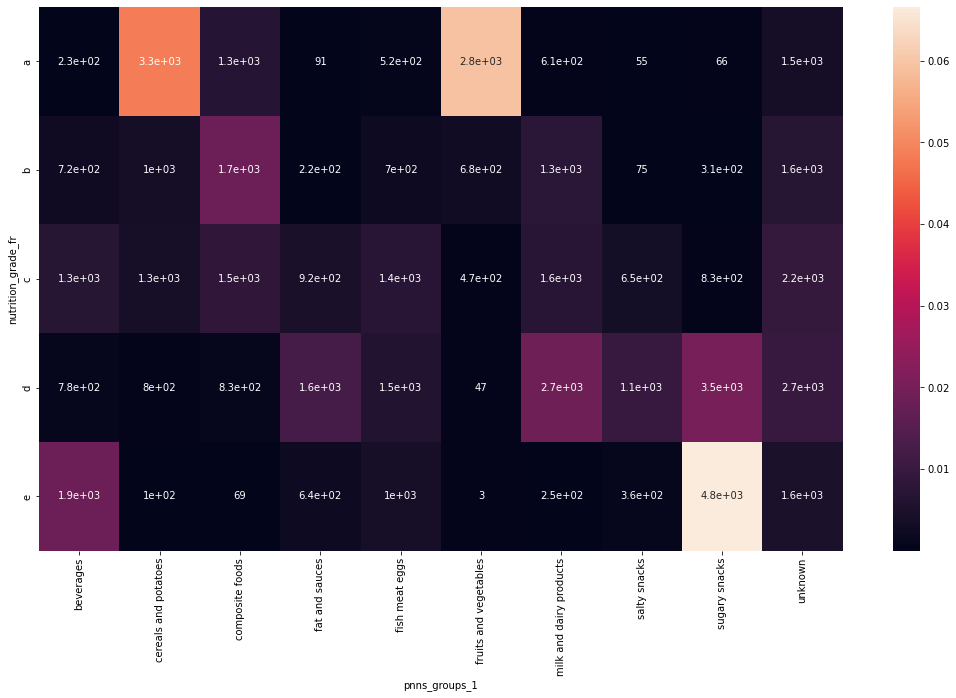

In [64]:
tx = cont.loc[:,["Total"]]
ty = cont.loc[["Total"],:]
n = len(data)
indep = tx.dot(ty) / n

c = cont.fillna(0) # On remplace les valeurs nulles par 0
measure = (c-indep)**2/indep
xi_n = measure.sum().sum()
table = measure/xi_n
plt.figure(figsize=(18,10))
sns.heatmap(table.iloc[:-1,:-1],annot=c.iloc[:-1,:-1])
plt.show()

Il n'y a vraiment que pour les catégories 'sugary snack' et 'fruits and vegetables' qu'un lien se dessine.

## Traitement des valeurs manquantes

Dans cette partie nous allons essayer de compléter nos données, en estimant les valeurs manquantes des variables de quantité pour 100g et de Nutri-Score. Pour ce qui est des additifs et de l'huile de palme, ça dépendra de l'application.

### Catégories

In [65]:
# On remplace les valeurs manquantes par 'unknown'
data['pnns_groups_1'] = data['pnns_groups_1'].fillna('unknown')
data['pnns_groups_2'] = data['pnns_groups_2'].fillna('unknown')

### Quantités pour 100g

Nous allons remplacer les valeurs manquantes par la médiane de la catégorie du produit. On utilise la médiane plutôt que la moyenne car la moyenne est sensible aux valeurs extrêmes. Pour voir l'impact de cette estimation, on va comparer la répartition des valeurs nutritionnelles avant et après avoir remplacé les valeurs manquantes.

On va travailler sur une copie de nos données afin de garder un accès rapide aux données incomplètes.

In [66]:
df = data.copy()

In [67]:
df_group = df.groupby(['pnns_groups_1'])

In [68]:
for c in quantite_et_energie_100g:
    df[c] = df_group[c].transform(lambda x: x.fillna(x.median()))

<AxesSubplot:title={'center':'après'}, ylabel='Frequency'>

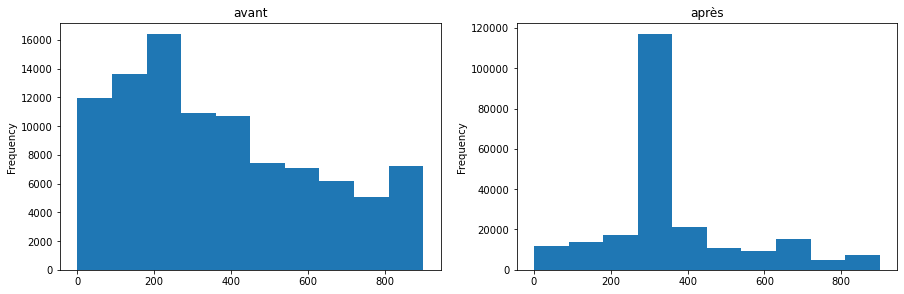

In [69]:
# Comparons la répartition des valeurs de quantité d'énergie
# Avant et après avoir remplacé les valeurs manquantes par la médiane par catégorie
plt.figure(figsize=(15, 10))
plt.subplot(221)
data['energy_100g'].plot(kind='hist', title='avant')
plt.subplot(222)
df['energy_100g'].plot(kind='hist', title='après')

[Text(0.5, 1.0, 'après')]

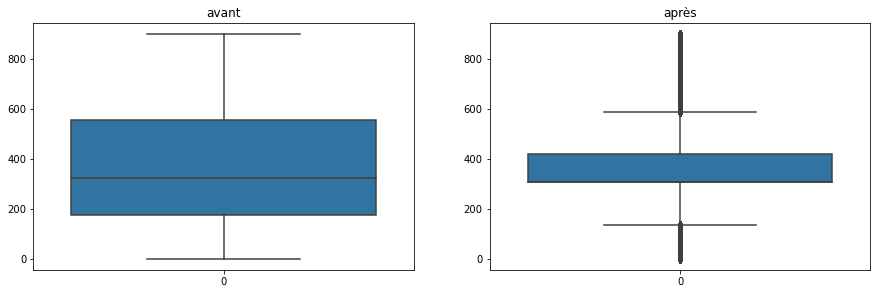

In [70]:
plt.figure(figsize=(15, 10))
plt.subplot(221)
sns.boxplot(data=data['energy_100g']).set(title='avant')
plt.subplot(222)
sns.boxplot(data=df['energy_100g']).set(title='après')

Le changement est très important, mais on pouvait s'y attendre vu le nombre de valeurs manquantes. On pourrait essayer de remplacer les valeurs manquantes par la moyenne par catégorie. Mais en réalité la valeur énergétique est une fonction dépendant des quantités de nutriments donc on pourrait peut-être recalculer les valeurs de la variable énergie à partir des autres variables. Il faudrait l'avis d'un spécialiste, mais avant tout nous allons vérifier que le remplacement des valeurs manquantes des autres variables n'a pas conduit à des changement aussi important que pour l'énergie.

[Text(0.5, 1.0, 'après')]

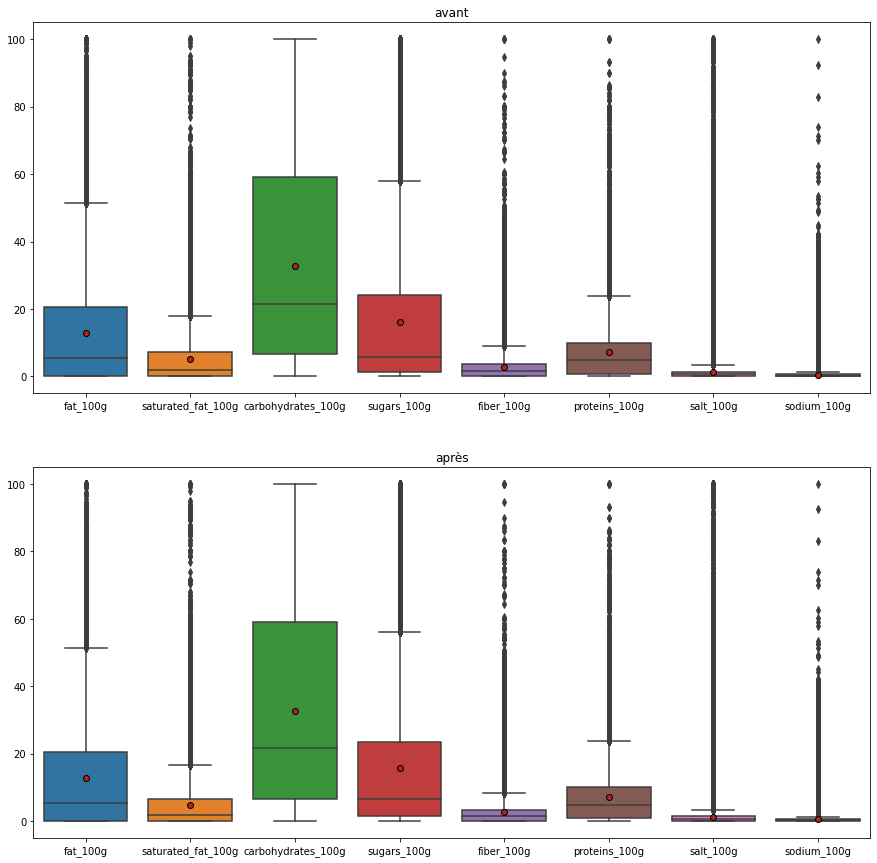

In [71]:
# Comparons la répartition des valeurs de quantité de nutriments
# Avant et après avoir remplacé les valeurs manquantes par la médiane par catégorie
plt.figure(figsize=(15, 15))
plt.subplot(211)
sns.boxplot(data=data[quantite_100g], showmeans=True, meanprops=meanprops).set(title='avant')
plt.subplot(212)
sns.boxplot(data=df[quantite_100g], showmeans=True, meanprops=meanprops).set(title='après')

Difficile de voir des différences, c'est bon signe. Vérifions quand même les indicateurs numériques pour être sûr qu'on a bien fait quelque chose.

In [72]:
data[quantite_100g].describe()

,fat_100g,saturated_fat_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,sodium_100g
count,227689.000000,207344.000000,227680.000000,222259.000000,180681.000000,228147.000000,227929.000000,227955.000000
mean,12.898067,5.036305,32.630142,16.023296,2.885238,7.134449,1.306741,0.523488
std,17.485249,7.705660,29.063898,21.169826,4.485105,8.083308,4.480113,1.897516
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,6.600000,1.380000,0.000000,0.780000,0.066000,0.026000
50%,5.360000,1.790000,21.540000,5.830000,1.600000,4.800000,0.589000,0.232000
75%,20.590000,7.140000,59.000000,24.000000,3.600000,10.015000,1.361000,0.536000
max,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000


In [73]:
df[quantite_100g].describe()

,fat_100g,saturated_fat_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,sodium_100g
count,228729.000000,228729.000000,228729.000000,228729.000000,228729.00000,228729.000000,228729.000000,228729.000000
mean,12.879592,4.733665,32.583676,15.756733,2.58696,7.128217,1.304076,0.522438
std,17.456622,7.398533,29.038095,20.931308,4.04556,8.075523,4.472547,1.894407
min,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,6.560000,1.500000,0.00000,0.790000,0.066000,0.026000
50%,5.360000,1.790000,21.540000,6.400000,1.60000,4.800000,0.592000,0.233000
75%,20.590000,6.670000,59.000000,23.330000,3.30000,10.000000,1.361000,0.536000
max,100.000000,100.000000,100.000000,100.000000,100.00000,100.000000,100.000000,100.000000


Les variation sont faibles, donc on va pouvoir travailler avec ces nouvelles valeurs (mais pas pour l'énergie).

### Corrélation entre les différents nutriments

In [74]:
corr = df[quantite_100g].corr()
corr

,fat_100g,saturated_fat_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,sodium_100g
fat_100g,1.000000,0.691569,-0.100059,-0.062545,0.109069,0.233278,-0.025306,-0.025933
saturated_fat_100g,0.691569,1.000000,-0.050337,0.071675,-0.011876,0.180733,-0.027146,-0.026943
carbohydrates_100g,-0.100059,-0.050337,1.000000,0.667592,0.257998,-0.106143,-0.052369,-0.051112
sugars_100g,-0.062545,0.071675,0.667592,1.000000,-0.018362,-0.260441,-0.088906,-0.084005
fiber_100g,0.109069,-0.011876,0.257998,-0.018362,1.000000,0.220413,-0.020060,-0.020814
proteins_100g,0.233278,0.180733,-0.106143,-0.260441,0.220413,1.000000,0.044511,0.038471
salt_100g,-0.025306,-0.027146,-0.052369,-0.088906,-0.020060,0.044511,1.000000,0.928731
sodium_100g,-0.025933,-0.026943,-0.051112,-0.084005,-0.020814,0.038471,0.928731,1.000000


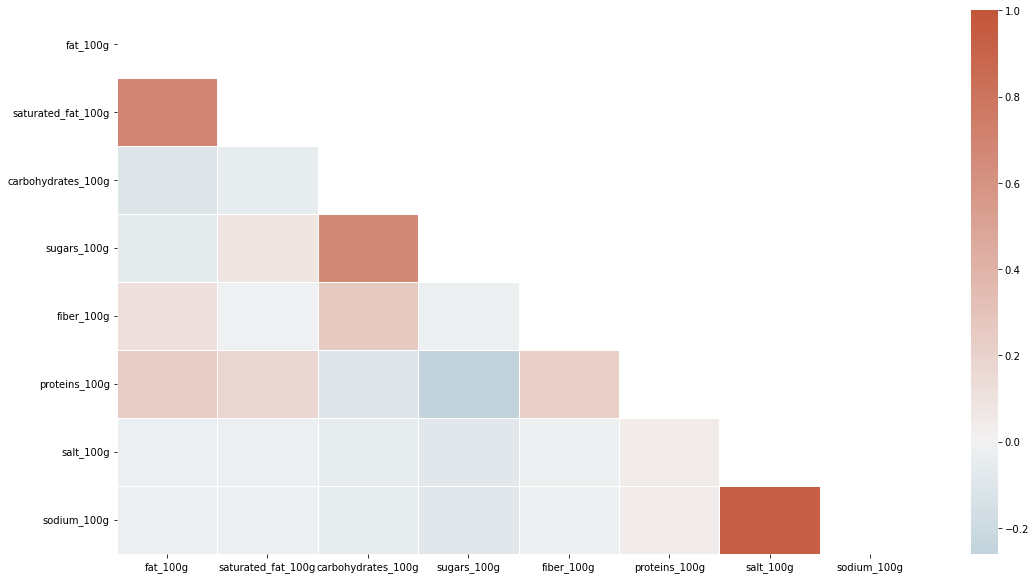

In [75]:
plt.figure(figsize=(18,10))
mask = np.triu(np.ones_like(corr, dtype=bool))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=1, center=0, linewidths=0.5)
plt.show()

Il n'y a rien d'autre que ce à quoi on pouvait s'attendre: corrélation entre graisses et graisses saturées, entre glucides et sucres, entre sel et sodium. Notons que la corrélation entre sel et sodium et tellement élevé qu'on peut peut-être supprimer une de ces deux variables. Il faudrait demander à un spécialiste quelle et la différence entre les deux.

### Régression linéaire pour le Nutri-Score

Nous allons maintenant essayer de compléter les valeurs manquantes du Nutri-Score. Il y a deux variables permettant d'indiquer le Nutri-Score: la variable 'nutrition-score-fr_100g' qui est un nombre compris entre -15 et 40, et qui permet de calculer la deuxième, 'nutrition-grade-fr', qui est une variable catégorielle ordonnée. Pour notre application nous n'utiliserons que 'nutrition-grade-fr'. 

Nous avons deux options pour estimer les valeurs manquantes de 'nutrition-grade-fr'. Nous pouvons les estimer directement à partir des quantités pour 100g en utilisant un modèle k-NN, c'est ce que nous ferons plus tard. Autrement nous pouvons les calculer à partir du Nutri-Score numérique 'nutrition-score-fr_100g' si nous disposons préalablement d'un modèle satisfaisant pour le completer. Bien sûre nous pouvons tenter les deux approches et comparer les résultats.

Dans cette section nous allons essayer de completer le Nutri-Score numérique à l'aide d'une régression linéaire.

In [76]:
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.metrics import mean_squared_error

In [77]:
quantite_et_nutri_score = ['fat_100g', 'saturated_fat_100g', 'carbohydrates_100g', 'sugars_100g', 'fiber_100g',
       'proteins_100g', 'salt_100g', 'sodium_100g', 'nutrition-score-fr_100g']

Séparons les données entre des données complètes et des données à completer, et les données complètes en deux échantillons: un pour entraîner notre modèle, et l'autre pour le tester.

In [78]:
a_completer = df[df['nutrition-score-fr_100g'].isna()][quantite_et_energie_100g]
complet = df[~(df['nutrition-score-fr_100g'].isna())][quantite_et_nutri_score]

In [79]:
X = complet[quantite_100g]
Y = complet['nutrition-score-fr_100g']

In [80]:
Xtrain, Xtest, Ytrain, Ytest = train_test_split(X, Y, shuffle=True, train_size=0.8)

### Entraînement du modèle

In [81]:
reg = linear_model.LinearRegression()

In [82]:
reg.fit(Xtrain,Ytrain)

LinearRegression()

In [83]:
reg.score(Xtrain, Ytrain)

0.7023715868717071

Le modèle linéaire ne semble pas convenir, mais faisons quand même un test sur l'échantillon prévu à cet effet.

### Test du modèle

In [84]:
prediction = reg.predict(Xtest)

In [85]:
rmse = mean_squared_error(Ytest, prediction, squared=False)
rmse

4.862165455845467

Text(0.5, 1.0, 'erreur')

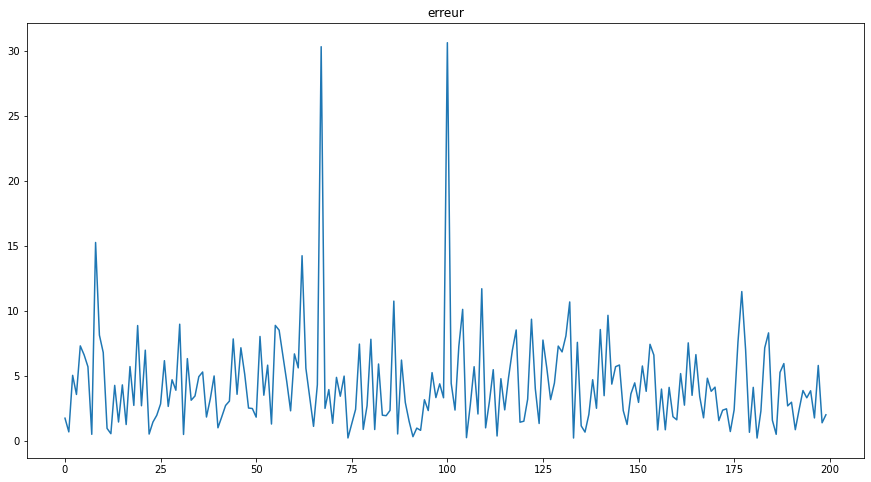

In [86]:
plt.figure(figsize=(15,8))
plt.plot(range(0, 200), abs(prediction[:200]-Ytest[:200]))
plt.title('erreur')

Effectivement l'erreur quadratique moyenne proche de 5 est élever pour une variable prenant des valeurs entre -15 et 40, d'autant plus qu'il y a une classe de Nutri-Score ayant une amplitude de seulement 2.

Essayons d'améliorer le modèle en faisant une régression linéaire par catégorie.

### Régression linéaire par catégorie

In [87]:
a_completer = df[df['nutrition-score-fr_100g'].isna()][colonnes]
complet = df[~(df['nutrition-score-fr_100g'].isna())][colonnes]
a_completer = a_completer.drop(['nutrition_grade_fr', 'nutrition-score-fr_100g'], axis=1)

In [88]:
X = complet[quantite_et_categ]
Y = complet['nutrition-score-fr_100g']

In [89]:
Xtrain, Xtest, Ytrain, Ytest = train_test_split(X, Y, shuffle=True, train_size=0.8)

In [90]:
erreurs = []
for i in np.unique(Xtrain['pnns_groups_1']):
    train_categ = Xtrain['pnns_groups_1']==i
    test_categ = Xtest['pnns_groups_1']==i
    
    Xtrain_categ = Xtrain[train_categ]
    Ytrain_categ = Ytrain[train_categ]
    
    Xtest_categ = Xtest[test_categ]
    Ytest_categ = Ytest[test_categ]
    
    lin_reg = linear_model.LinearRegression()
    lin_reg.fit(Xtrain_categ[quantite_100g], Ytrain_categ)
    prediction = lin_reg.predict(Xtest_categ[quantite_100g])
    erreurs.append(mean_squared_error(Ytest_categ, prediction, squared=False))

In [91]:
erreurs

[5.251521509525317,
 3.233359111654168,
 3.13969797402338,
 4.4494818989548275,
 3.8159725519626977,
 3.4214401703969393,
 1.9402117795519422,
 3.709115520498609,
 3.202337408887381,
 4.663733900370145]

Pour certaines catégories il y a bien une amélioration du modèle mais ça reste globalement pas très performant. Voyons si l'estimation de la classe du Nutri-Score sans passer par le Nutri-Score numérique donne de bon résultat.

### Nutri-Score grade

In [92]:
# On va utiliser un modèle k-NN
from sklearn import neighbors

In [93]:
quantite_et_nutri_score_grade = ['fat_100g', 'saturated_fat_100g', 'carbohydrates_100g', 'sugars_100g', 'fiber_100g',
       'proteins_100g', 'salt_100g', 'sodium_100g', 'nutrition_grade_fr']

In [94]:
a_completer = df[df['nutrition_grade_fr'].isna()][quantite_100g]
complet = df[~(df['nutrition_grade_fr'].isna())][quantite_et_nutri_score_grade]

In [95]:
X = complet[quantite_100g]
Y = complet['nutrition_grade_fr']

In [96]:
Xtrain, Xtest, Ytrain, Ytest = train_test_split(X, Y, shuffle=True, train_size=0.8)

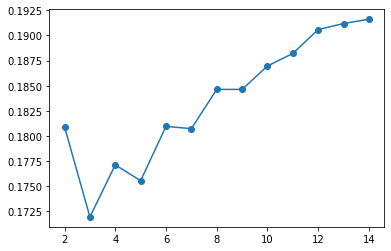

In [97]:
errors = []
for k in range(2, 15): # on test différentes valeurs pour l'hyperparamètre k
    knn = neighbors.KNeighborsClassifier(k)
    errors.append(1-knn.fit(Xtrain, Ytrain).score(Xtest, Ytest))
plt.plot(range(2,15), errors, 'o-')
plt.show()

In [98]:
# k=3 semble être le meilleur choix
knn = neighbors.KNeighborsClassifier(n_neighbors=3)
knn.fit(Xtrain, Ytrain)
erreur = 1 - knn.score(Xtest, Ytest)
erreur

0.1719542988574715

Notre modèle effectue une prédiction correcte sur l'échantillon de test dans plus de 80% des cas. 

On va complèter les valeurs manquantes à l'aide de notre modèle, puis reformer un dataframe complet. On oublie le Nutri-Score numérique.

In [99]:
a_completer['nutrition_grade_fr'] = knn.predict(a_completer[quantite_100g])

In [100]:
data_final = pd.concat([complet, a_completer]).sort_index()


In [101]:
cols = ['code', 'product_name', 'countries_fr', 'ingredients_text',
       'serving_size', 'additives_n', 'additives', 'ingredients_from_palm_oil_n',
       'ingredients_that_may_be_from_palm_oil_n', 'pnns_groups_1', 'pnns_groups_2',]

In [102]:
data_final = pd.concat([data[cols], data_final], axis=1)
data_final.head()

,code,product_name,countries_fr,ingredients_text,serving_size,additives_n,additives,ingredients_from_palm_oil_n,ingredients_that_may_be_from_palm_oil_n,pnns_groups_1,pnns_groups_2,fat_100g,saturated_fat_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,sodium_100g,nutrition_grade_fr
0,0000000004530,Banana Chips Sweetened (Whole),États-Unis,"Bananas, vegetable oil (coconut oil, corn oil ...",28 g (1 ONZ),0.0,[ bananas -> en:bananas ] [ vegetable-oil -...,0.0,0.0,unknown,unknown,28.57,28.57,64.29,14.29,3.6,3.57,0.000,0.000,d
1,0000000004559,Peanuts,États-Unis,"Peanuts, wheat flour, sugar, rice flour, tapio...",28 g (0.25 cup),0.0,[ peanuts -> en:peanuts ] [ wheat-flour -> ...,0.0,0.0,unknown,unknown,17.86,0.00,60.71,17.86,7.1,17.86,0.635,0.250,b
2,0000000016087,Organic Salted Nut Mix,États-Unis,"Organic hazelnuts, organic cashews, organic wa...",28 g (0.25 cup),0.0,[ organic-hazelnuts -> en:organic-hazelnuts ...,0.0,0.0,unknown,unknown,57.14,5.36,17.86,3.57,7.1,17.86,1.224,0.482,d
3,0000000016100,Breadshop Honey Gone Nuts Granola,États-Unis,"Rolled oats, grape concentrate, expeller press...",52 g (0.5 cup),0.0,[ rolled-oats -> en:rolled-oats ] [ oats ->...,0.0,0.0,unknown,unknown,18.27,1.92,63.46,11.54,7.7,13.46,0.607,0.239,a
4,0000000016124,Organic Muesli,États-Unis,"Org oats, org hemp granola (org oats, evaporat...",64 g (0.5 cup),2.0,[ org-oats -> en:org-oats ] [ oats -> en:oa...,0.0,0.0,unknown,unknown,18.75,4.69,57.81,15.62,9.4,14.06,0.140,0.055,c


## Réduction de la dimension

Nous allons effectuer une ACP pour voir si on peut réduire le nombre de variable. 

In [103]:
from functions import *
from sklearn import decomposition
from sklearn import preprocessing

In [104]:
data_pca = df[quantite_100g]

In [105]:
X = data_pca.values
names = data_pca.index

In [106]:
std_scaled = preprocessing.StandardScaler().fit(X)
X_scaled = std_scaled.transform(X)

In [107]:
pca = decomposition.PCA(n_components=len(quantite_100g))
pca.fit(X_scaled)

PCA(n_components=8)

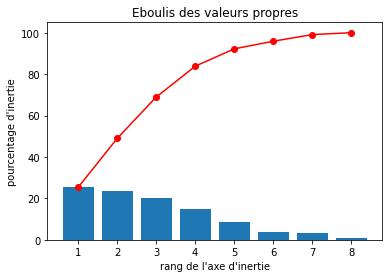

In [108]:
display_scree_plot(pca)

Les quatres premières composantes permettent de d'écrire 80% des données.

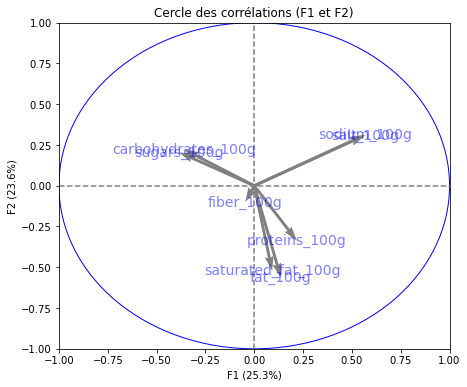

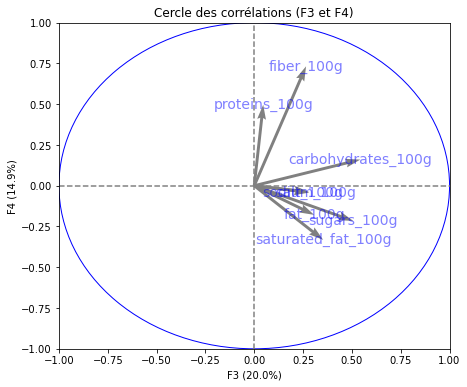

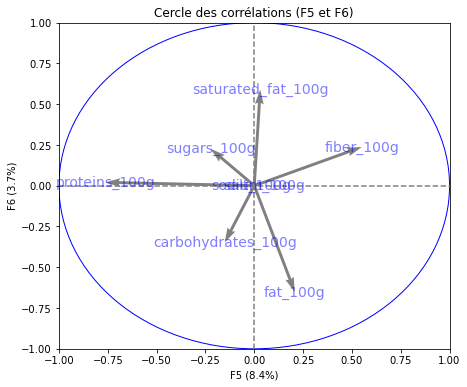

In [109]:
pcs = pca.components_
display_circles(pcs, 8, pca, [(0,1),(2,3),(4,5)], labels=np.array(quantite_100g))

## Fichier final

En fonction de l'application on pourra supprimer d'autres colonnes.

In [110]:
data_final.columns

Index(['code', 'product_name', 'countries_fr', 'ingredients_text',
       'serving_size', 'additives_n', 'additives',
       'ingredients_from_palm_oil_n',
       'ingredients_that_may_be_from_palm_oil_n', 'pnns_groups_1',
       'pnns_groups_2', 'fat_100g', 'saturated_fat_100g', 'carbohydrates_100g',
       'sugars_100g', 'fiber_100g', 'proteins_100g', 'salt_100g',
       'sodium_100g', 'nutrition_grade_fr'],
      dtype='object')

In [111]:
colonnes_a_supprimer = []

In [112]:
data_final = data_final.drop(colonnes_a_supprimer, axis=1)

In [113]:
data_final

,code,product_name,countries_fr,ingredients_text,serving_size,additives_n,additives,ingredients_from_palm_oil_n,ingredients_that_may_be_from_palm_oil_n,pnns_groups_1,pnns_groups_2,fat_100g,saturated_fat_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,sodium_100g,nutrition_grade_fr
0,0000000004530,Banana Chips Sweetened (Whole),États-Unis,"Bananas, vegetable oil (coconut oil, corn oil ...",28 g (1 ONZ),0.0,[ bananas -> en:bananas ] [ vegetable-oil -...,0.0,0.0,unknown,unknown,28.57,28.57,64.29,14.29,3.6,3.57,0.000,0.000,d
1,0000000004559,Peanuts,États-Unis,"Peanuts, wheat flour, sugar, rice flour, tapio...",28 g (0.25 cup),0.0,[ peanuts -> en:peanuts ] [ wheat-flour -> ...,0.0,0.0,unknown,unknown,17.86,0.00,60.71,17.86,7.1,17.86,0.635,0.250,b
2,0000000016087,Organic Salted Nut Mix,États-Unis,"Organic hazelnuts, organic cashews, organic wa...",28 g (0.25 cup),0.0,[ organic-hazelnuts -> en:organic-hazelnuts ...,0.0,0.0,unknown,unknown,57.14,5.36,17.86,3.57,7.1,17.86,1.224,0.482,d
3,0000000016100,Breadshop Honey Gone Nuts Granola,États-Unis,"Rolled oats, grape concentrate, expeller press...",52 g (0.5 cup),0.0,[ rolled-oats -> en:rolled-oats ] [ oats ->...,0.0,0.0,unknown,unknown,18.27,1.92,63.46,11.54,7.7,13.46,0.607,0.239,a
4,0000000016124,Organic Muesli,États-Unis,"Org oats, org hemp granola (org oats, evaporat...",64 g (0.5 cup),2.0,[ org-oats -> en:org-oats ] [ oats -> en:oa...,0.0,0.0,unknown,unknown,18.75,4.69,57.81,15.62,9.4,14.06,0.140,0.055,c
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
228724,9847548283004,Tartines craquantes bio au sarrasin,France,NaN,NaN,NaN,NaN,NaN,NaN,cereals and potatoes,bread,2.80,0.60,74.80,2.60,5.9,13.00,0.680,0.268,a
228725,989898,Test NF App,Suisse,"Coco, choco",NaN,0.0,[ coco -> fr:coco ] [ choco -> fr:choco ],0.0,0.0,unknown,unknown,31.00,1.79,12.20,9.60,1.1,2.10,1.100,0.433,d
228726,99111250,Thé vert Earl grey,France,"thé vert, arôme naturel bergamote avec autres ...",NaN,0.0,[ the-vert -> fr:the-vert ] [ the -> fr:the...,0.0,0.0,beverages,non sugared beverages,0.20,0.20,0.50,0.50,0.2,0.50,0.025,0.010,c
228727,99567453,"Mint Melange Tea A Blend Of Peppermint, Lemon ...",États-Unis,"Organic peppermint, organic lemon grass, organ...",20 g (0.7 oz),0.0,[ organic-peppermint -> en:organic-peppermint...,0.0,0.0,unknown,unknown,0.00,0.00,0.00,0.00,0.0,0.00,0.000,0.000,b


In [115]:
data_final.to_csv("food_facts_final.csv", index = False)